## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [17]:
ufo_sighting_df = pd.read_csv("ufo_sightings.csv", index_col ="#")
ufo_sighting_df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
#,,,,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [18]:
ufo_sighting_df.info()

non_null_df = ufo_sighting_df.dropna()
non_null_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ----

### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [20]:
dropped_df = non_null_df.drop(["Described_Duration", "Description", "Date_Documented"], axis=1)
dropped_df

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333
...,...,...,...,...,...,...,...,...
65531,8/12/2011 23:15,Yonkers,NY,US,light,3600.0,40.931111,-73.899167
65532,8/12/2011 23:27,Mandeville,LA,US,sphere,60.0,30.358056,-90.065556
65533,8/12/2012 00:00,Davis,CA,US,unknown,900.0,38.545000,-121.739444


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [23]:
dropped_df["Date_Time"] = pd.to_datetime(dropped_df["Date_Time"])
dropped_df.info()
dropped_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

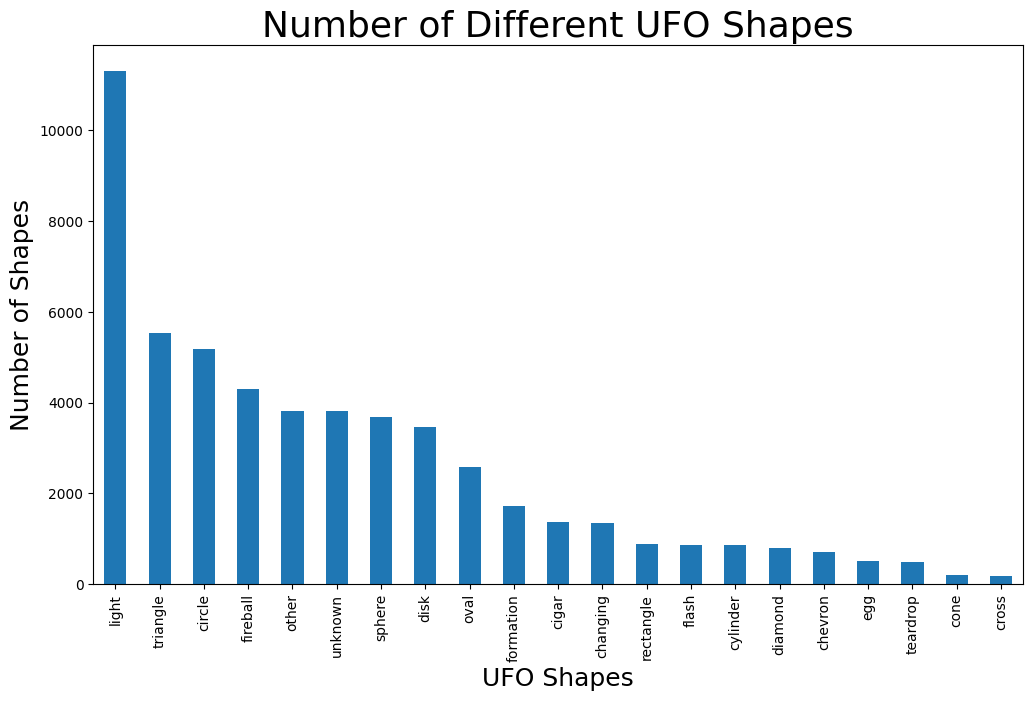

In [48]:
ufo_shape_counts = dropped_df["UFO_Shape"].value_counts()

ufo_shape_counts.plot.bar(figsize=(12,7));

plt.title("Number of Different UFO Shapes", fontsize=26);

plt.xlabel("UFO Shapes", fontsize=18);
plt.ylabel("Number of Shapes", fontsize=18);

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

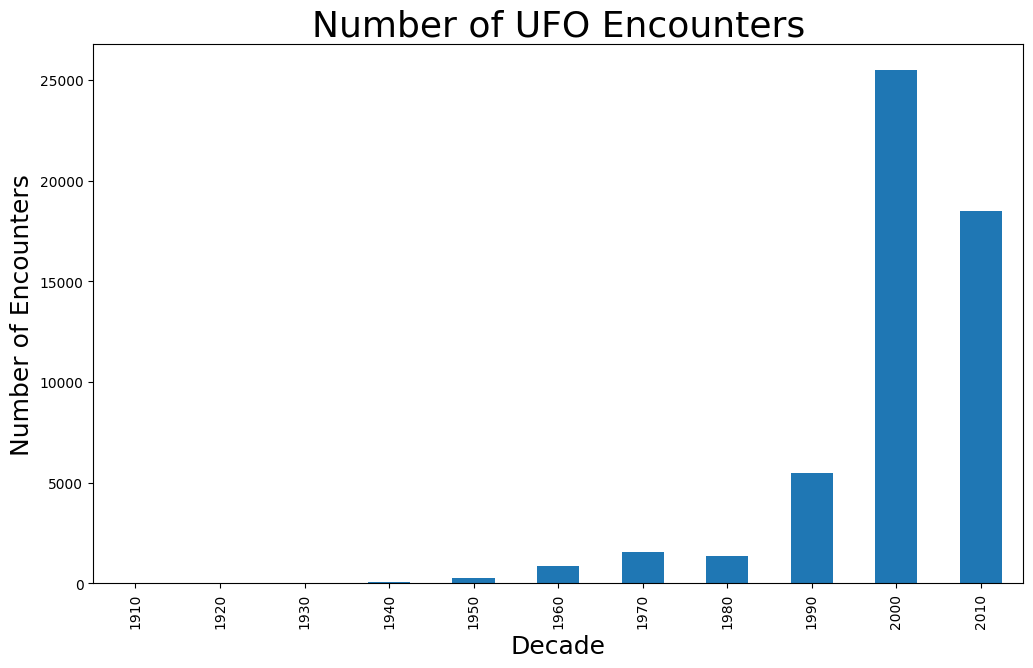

In [75]:
dropped_df["Sighting Year"] = dropped_df["Date_Time"].dt.year
dropped_df.head()

dropped_df["Sighting Year"].value_counts().sort_index().plot.bar(figsize=(12,7));
dropped_df["10 Year Interval"] = (dropped_df["Sighting Year"] // 10) * 10
dropped_df.head()

dropped_df["10 Year Interval"].value_counts().sort_index().plot.bar(figsize=(12,7));

plt.title("Number of UFO Encounters", fontsize=26);
plt.xlabel("Decade", fontsize=18);
plt.ylabel("Number of Encounters", fontsize=18);


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

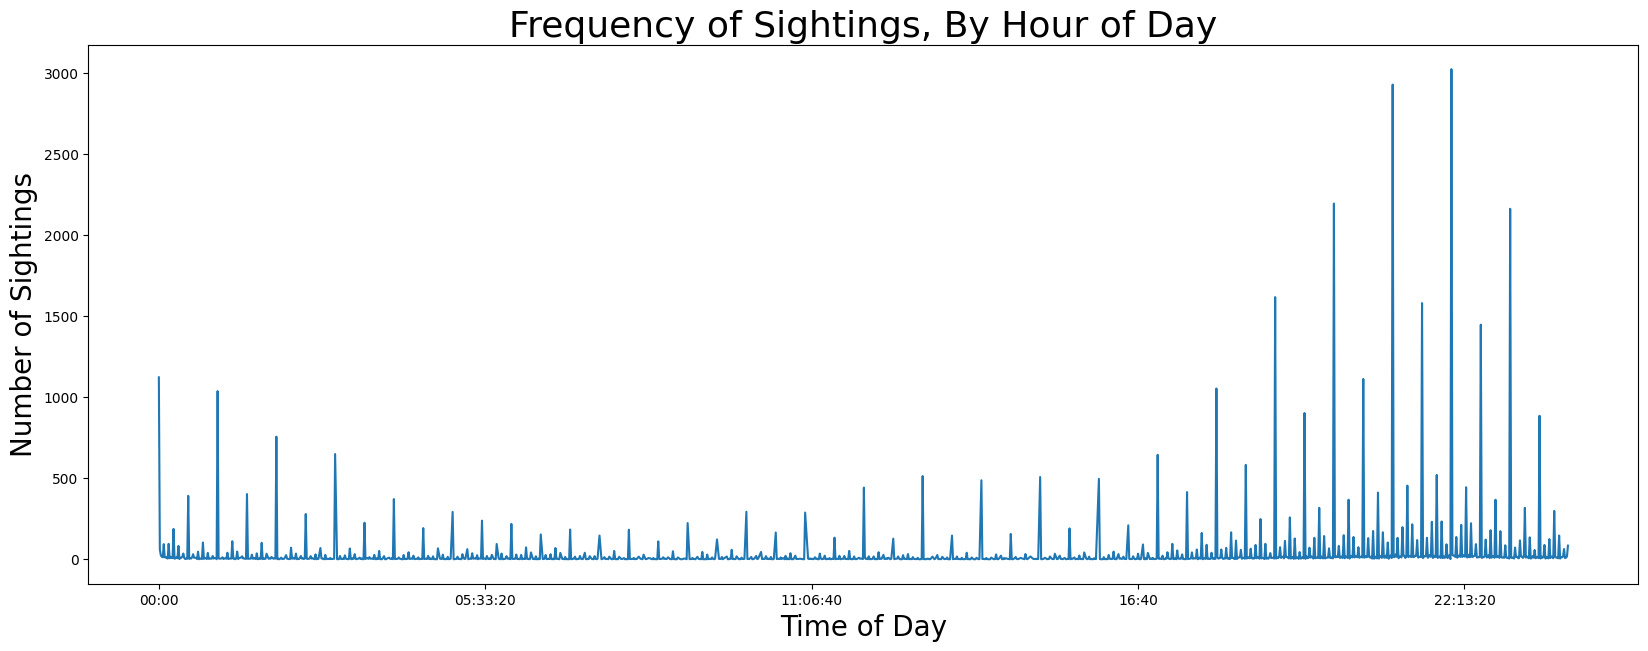

In [99]:
dropped_df["Sighting Year"] = dropped_df["Date_Time"].dt.year
dropped_df.head()

num_of_sightings_by_hour = dropped_df["Sighting Time"].value_counts().plot.line(figsize=(20,7));

plt.title("Frequency of Sightings, By Hour of Day", fontsize=26);
plt.xlabel("Time of Day", fontsize=20);
plt.ylabel("Number of Sightings", fontsize=20);


### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * The most frequently reported UFO shape is light. 

2. Which shape is least frequently reported?
    * The least frequently reported UFO shape is a cross. 

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Between 6pm and 3 am with the most frequent around 10:13pm. 

4. Are there other factors that may account for this pattern in the data?
    * They may be seeing other things like stars, planets, planes or other lights in the sky. 

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * No UFO sightings were reported prior to 1940. Upon doing a little research, the cold war and CIA involvement brought on the first wave of UFO sightings. There seems to be a correlation between what was going on at that time and the sightings. Also, it probably was more taboo to talk about UFO's prior to 1940 than it is now. UFO sightings are more widely accepted today than it was in the past. There does seem to be a downward trend in UFO sightings and maybe that is due to some of the shapes that are seen can be explained by other things. 

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * It would be best to look for UFO sightings after dark and before dawn, however 10:13pm seems to be the most optimal time. I would recommend looking for lights, triangles and circles.  


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart